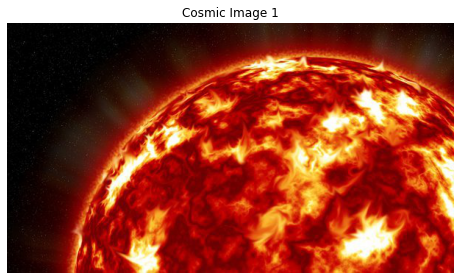

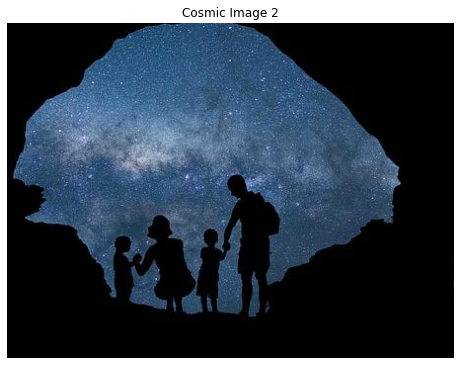

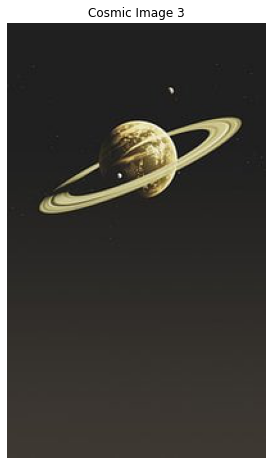

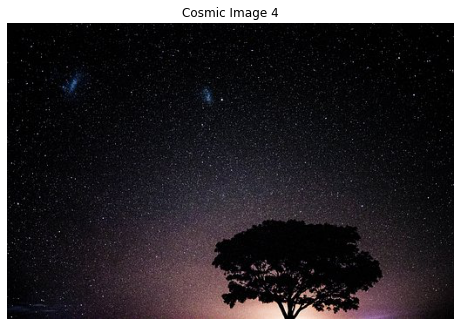

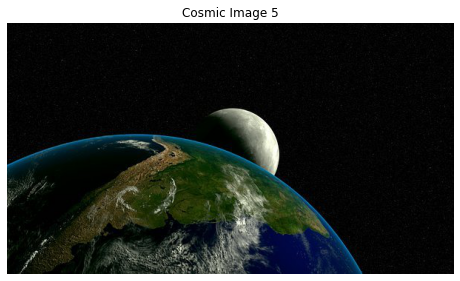

In [1]:
from PIL import Image
import os
import matplotlib.pyplot as plt

# Path to the directory containing your cosmic image dataset
dataset_dir = "data/img_align_celeba/"

# List all JPG files in the dataset directory
image_files = [f for f in os.listdir(dataset_dir) if f.endswith('.jpg')]

# Load and display the first few images
num_images_to_display = 5

for i in range(num_images_to_display):
    image_path = os.path.join(dataset_dir, image_files[i])
    image = Image.open(image_path)
    plt.figure(figsize=(8, 8))
    plt.imshow(image)
    plt.axis('off')
    plt.title(f'Cosmic Image {i+1}')
    plt.show()


In [2]:
# from PIL import Image
# import os

# # Path to the directory containing your cosmic image dataset
# dataset_dir = "data/img_align_celeba/"

# # Output directory to save resized images
# output_dir = "data/img_align_celeba2/"

# # Target size for resizing
# target_size = (256, 256)  # Adjust the size as needed

# # List all image files in the dataset directory
# image_files = [f for f in os.listdir(dataset_dir) if f.endswith('.jpg')]

# # Resize and save images
# for image_file in image_files:
#     image_path = os.path.join(dataset_dir, image_file)
#     image = Image.open(image_path)
    
#     # Convert RGBA image to RGB
#     if image.mode == 'LA' or image.mode == 'RGBA':
#         image = image.convert('RGB')
    
#     # Resize image
#     resized_image = image.resize(target_size)
    
#     # Save resized image
#     output_path = os.path.join(output_dir, image_file)
#     resized_image.save(output_path)


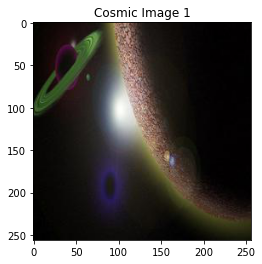

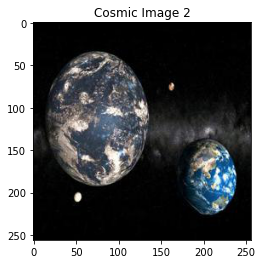

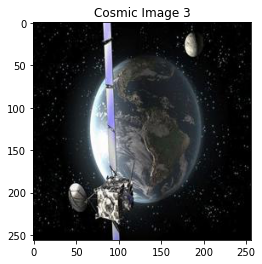

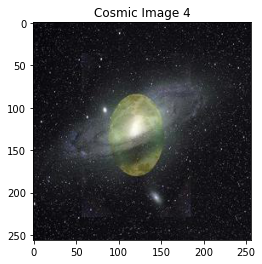

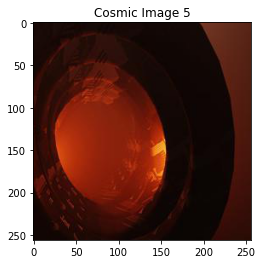

In [3]:
from PIL import Image
import os
import matplotlib.pyplot as plt

# Path to the directory containing your cosmic image dataset
dataset_dir = "data/img_align_celeba2/"

# List all JPG files in the dataset directory
image_files = [f for f in os.listdir(dataset_dir) if f.endswith('.jpg')]

# Load and display the first few images
num_images_to_display = 5

for i in range(num_images_to_display):
    image_path = os.path.join(dataset_dir, image_files[i+10])
    image = Image.open(image_path)
    plt.figure(figsize=(4, 4))
    plt.imshow(image)
    #plt.axis('off')
    plt.title(f'Cosmic Image {i+1}')
    plt.show()


In [4]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, Model

# Function to load and preprocess images from JPG files
def load_images(directory, target_size=(256, 256)):
    images = []
    for filename in os.listdir(directory):
        if filename.endswith(".jpg"):
            img = tf.keras.preprocessing.image.load_img(
                os.path.join(directory, filename),
                target_size=target_size
            )
            img = tf.keras.preprocessing.image.img_to_array(img) / 255.0
            images.append(img)
    return np.array(images)

# Load images from directory
dataset_directory = "data/img_align_celeba2/"
image_data = load_images(dataset_directory)

In [5]:
# learning_rates = [0.0001, 0.0005, 0.001]
# batch_sizes = [16, 32, 64]
# num_epochs = 10
# for lr in learning_rates:
#     for batch_size in batch_sizes:
#         print(f"Training with learning rate: {lr}, batch size: {batch_size}")
        
#         # Build and compile GAN model with current hyperparameters
#         generator = build_generator(input_shape)
#         discriminator = build_discriminator((256, 256, 3))
#         gan = GAN(generator, discriminator)
#         gan.compile(
#             d_optimizer=tf.keras.optimizers.Adam(lr, beta_1=0.5),
#             g_optimizer=tf.keras.optimizers.Adam(lr, beta_1=0.5),
#             loss_fn=tf.keras.losses.BinaryCrossentropy(),
#         )
        
#         # Train GAN model
#         gan.fit(image_data, epochs=num_epochs, batch_size=batch_size, verbose=1)
        
#         # Evaluate the trained model (e.g., FID score, visual inspection)
#         evaluation_results = evaluate_model(gan, test_dataset)
        
#         # Record the performance of the model
#         record_results(lr, batch_size, evaluation_results)


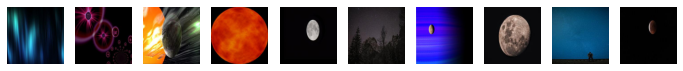

In [25]:
import matplotlib.pyplot as plt
num_images_to_generate = 10
# Assuming generated_images contains the vector representations of generated images
# Rescale pixel values to [0, 255] and convert to integer
real_images = image_data[np.random.randint(0, image_data.shape[0], 10)]


# Plot the generated images
plt.figure(figsize=(12, 12))
for i in range(real_images.shape[0]):
    plt.subplot(1, real_images.shape[0], i + 1)
    plt.imshow(real_images[i])
    plt.axis('off')
plt.show()


In [26]:
real_images.shape

(10, 256, 256, 3)

In [8]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models


# Function to build the generator model
def build_generator(input_shape):
    model = tf.keras.Sequential()
    model.add(layers.Dense(64 * 64 * 64, input_shape=input_shape))
    model.add(layers.Reshape((64, 64, 64)))
    model.add(layers.BatchNormalization())
    model.add(layers.ReLU())

    model.add(layers.Conv2DTranspose(64, (5, 5), strides=(2, 2), padding='same'))
    model.add(layers.BatchNormalization())
    model.add(layers.ReLU())

    model.add(layers.Conv2DTranspose(32, (5, 5), strides=(2, 2), padding='same'))
    model.add(layers.BatchNormalization())
    model.add(layers.ReLU())

    model.add(layers.Conv2DTranspose(3, (5, 5), activation='sigmoid', padding='same'))
    return model

# Function to build the discriminator model
def build_discriminator(input_shape):
    model = tf.keras.Sequential()
    model.add(layers.Conv2D(32, (5, 5), strides=(2, 2), padding='same', input_shape=input_shape))
    model.add(layers.LeakyReLU(alpha=0.2))

    model.add(layers.Conv2D(64, (5, 5), strides=(2, 2), padding='same'))
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU(alpha=0.2))

    model.add(layers.Flatten())
    model.add(layers.Dense(128))
    model.add(layers.LeakyReLU(alpha=0.2))
    model.add(layers.Dense(1, activation='sigmoid'))
    return model

# Define hyperparameters
LATENT_DIM = 100
num_epochs = 10
batch_size = 64

# Build generator and discriminator models
input_shape = (LATENT_DIM,)
generator = build_generator(input_shape)
discriminator = build_discriminator((256, 256, 3))

# Compile discriminator
discriminator.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Combine generator and discriminator to form GAN
discriminator.trainable = False
gan_input = tf.keras.Input(shape=(LATENT_DIM,))
gan_output = discriminator(generator(gan_input))
gan = models.Model(gan_input, gan_output)
gan.compile(optimizer='adam', loss='binary_crossentropy')

# Train GAN model
for epoch in range(num_epochs):
    noise = np.random.normal(size=(batch_size, LATENT_DIM))
    generated_images = generator.predict(noise)
    real_images = image_data[np.random.randint(0, image_data.shape[0], batch_size)]

    # For training GAN, label real images as 1 and fake images as 0
    real_labels = np.ones((batch_size, 1))
    fake_labels = np.zeros((batch_size, 1))

    # Train discriminator on real images
    d_loss_real = discriminator.train_on_batch(real_images, real_labels)

    # Train discriminator on fake images
    d_loss_fake = discriminator.train_on_batch(generated_images, fake_labels)

    # Train generator (via the GAN model)
    noise = np.random.normal(size=(batch_size, LATENT_DIM))
    g_loss = gan.train_on_batch(noise, real_labels)

    # Print progress
    print(f"Epoch {epoch+1}/{num_epochs} - Discriminator Loss: {0.5 * np.add(d_loss_real, d_loss_fake)} - Generator Loss: {g_loss}")




2/2 [==============================] - 3s 1s/step
Epoch 1/10 - Discriminator Loss: [70.406555   0.1171875] - Generator Loss: 2.5156880270682206e-25
2/2 [==============================] - 3s 1s/step
Epoch 2/10 - Discriminator Loss: [7.75901031 0.5       ] - Generator Loss: 1.031949586780836e-18
2/2 [==============================] - 3s 2s/step
Epoch 3/10 - Discriminator Loss: [0. 1.] - Generator Loss: 4.832319245906547e-05
2/2 [==============================] - 3s 2s/step
Epoch 4/10 - Discriminator Loss: [8.35889038e-17 1.00000000e+00] - Generator Loss: 2.951448188224983e-15
2/2 [==============================] - 3s 2s/step
Epoch 5/10 - Discriminator Loss: [9.96004761e-16 1.00000000e+00] - Generator Loss: 6.985597626353572e-21
2/2 [==============================] - 3s 2s/step
Epoch 6/10 - Discriminator Loss: [1.03487217 0.9921875 ] - Generator Loss: 0.0
2/2 [==============================] - 3s 2s/step
Epoch 7/10 - Discriminator Loss: [0. 1.] - Generator Loss: 0.0
2/2 [=================

In [48]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

# Assuming 'generator' is your trained generator model
# Assuming 'image_data' is your dataset of real images

# Select a subset of real images from your dataset
num_images_to_generate = 10
real_images_subset = image_data[:num_images_to_generate]

# Define the desired input shape for resizing the images
input_shape = (256, 256)  # Example input shape (adjust according to your generator's input shape)

# Preprocess the real images subset to match the input shape expected by the generator model
# For example, resize the images to match the generator's input size
#real_images_preprocessed = tf.image.resize_with_pad(real_images_subset, input_shape[0], input_shape[1])

# Convert to NumPy array and scale pixel values to [0, 1] range if necessary
#real_images_preprocessed = np.array(real_images_preprocessed) / 255.0

# Reshape the images to match the input shape expected by the generator model
#real_images_preprocessed = tf.reshape(real_images_preprocessed, (-1,) + input_shape + (3,)) 

# Generate images using the trained generator model with real image values as input
generated_images = generator.predict(real_images_subset)

# Plot the generated images
plt.figure(figsize=(10, 10))
for i in range(num_images_to_generate):
    plt.subplot(1, num_images_to_generate, i+1)
    plt.imshow(generated_images[i])
    plt.axis('off')
plt.show()


InvalidArgumentError: Graph execution error:

Detected at node 'sequential_2/dense_3/BiasAdd' defined at (most recent call last):
    File "C:\Users\syedi\anaconda3\lib\runpy.py", line 197, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "C:\Users\syedi\anaconda3\lib\runpy.py", line 87, in _run_code
      exec(code, run_globals)
    File "C:\Users\syedi\anaconda3\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
      app.launch_new_instance()
    File "C:\Users\syedi\anaconda3\lib\site-packages\traitlets\config\application.py", line 846, in launch_instance
      app.start()
    File "C:\Users\syedi\anaconda3\lib\site-packages\ipykernel\kernelapp.py", line 677, in start
      self.io_loop.start()
    File "C:\Users\syedi\anaconda3\lib\site-packages\tornado\platform\asyncio.py", line 199, in start
      self.asyncio_loop.run_forever()
    File "C:\Users\syedi\anaconda3\lib\asyncio\base_events.py", line 601, in run_forever
      self._run_once()
    File "C:\Users\syedi\anaconda3\lib\asyncio\base_events.py", line 1905, in _run_once
      handle._run()
    File "C:\Users\syedi\anaconda3\lib\asyncio\events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "C:\Users\syedi\anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 471, in dispatch_queue
      await self.process_one()
    File "C:\Users\syedi\anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 460, in process_one
      await dispatch(*args)
    File "C:\Users\syedi\anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 367, in dispatch_shell
      await result
    File "C:\Users\syedi\anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 662, in execute_request
      reply_content = await reply_content
    File "C:\Users\syedi\anaconda3\lib\site-packages\ipykernel\ipkernel.py", line 360, in do_execute
      res = shell.run_cell(code, store_history=store_history, silent=silent)
    File "C:\Users\syedi\anaconda3\lib\site-packages\ipykernel\zmqshell.py", line 532, in run_cell
      return super().run_cell(*args, **kwargs)
    File "C:\Users\syedi\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2863, in run_cell
      result = self._run_cell(
    File "C:\Users\syedi\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2909, in _run_cell
      return runner(coro)
    File "C:\Users\syedi\anaconda3\lib\site-packages\IPython\core\async_helpers.py", line 129, in _pseudo_sync_runner
      coro.send(None)
    File "C:\Users\syedi\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3106, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "C:\Users\syedi\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3309, in run_ast_nodes
      if await self.run_code(code, result, async_=asy):
    File "C:\Users\syedi\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3369, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "C:\Users\syedi\AppData\Local\Temp\ipykernel_24456\635018205.py", line 23, in <cell line: 23>
      generated_images = generator.predict(real_images_preprocessed)
    File "C:\Users\syedi\anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\syedi\anaconda3\lib\site-packages\keras\engine\training.py", line 2253, in predict
      tmp_batch_outputs = self.predict_function(iterator)
    File "C:\Users\syedi\anaconda3\lib\site-packages\keras\engine\training.py", line 2041, in predict_function
      return step_function(self, iterator)
    File "C:\Users\syedi\anaconda3\lib\site-packages\keras\engine\training.py", line 2027, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\syedi\anaconda3\lib\site-packages\keras\engine\training.py", line 2015, in run_step
      outputs = model.predict_step(data)
    File "C:\Users\syedi\anaconda3\lib\site-packages\keras\engine\training.py", line 1983, in predict_step
      return self(x, training=False)
    File "C:\Users\syedi\anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\syedi\anaconda3\lib\site-packages\keras\engine\training.py", line 557, in __call__
      return super().__call__(*args, **kwargs)
    File "C:\Users\syedi\anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\syedi\anaconda3\lib\site-packages\keras\engine\base_layer.py", line 1097, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "C:\Users\syedi\anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\syedi\anaconda3\lib\site-packages\keras\engine\sequential.py", line 410, in call
      return super().call(inputs, training=training, mask=mask)
    File "C:\Users\syedi\anaconda3\lib\site-packages\keras\engine\functional.py", line 510, in call
      return self._run_internal_graph(inputs, training=training, mask=mask)
    File "C:\Users\syedi\anaconda3\lib\site-packages\keras\engine\functional.py", line 667, in _run_internal_graph
      outputs = node.layer(*args, **kwargs)
    File "C:\Users\syedi\anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\syedi\anaconda3\lib\site-packages\keras\engine\base_layer.py", line 1097, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "C:\Users\syedi\anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\syedi\anaconda3\lib\site-packages\keras\layers\core\dense.py", line 252, in call
      outputs = tf.nn.bias_add(outputs, self.bias)
Node: 'sequential_2/dense_3/BiasAdd'
In[0] and In[1] has different ndims: [10,256,256,3] vs. [100,262144]
	 [[{{node sequential_2/dense_3/BiasAdd}}]] [Op:__inference_predict_function_4814]